# Demonstration: Adjusted $R^2$ and the Fischer Test

First we have our standard header with common import statements, and a statement to make plots look nice.

In [1]:
# standard import statements
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as opt

import classlib4334

# jupyter-specific display instructions
mpl.rcParams['font.size'] = 11
mpl.rcParams['lines.linewidth'] = 2
%config InlineBackend.figure_format = 'retina'

The demonstration is all about polynomial models, so let's define a bunch of them.

In [2]:
def p1(x, a, b):
    return a + b*x

def p2(x, a, b, c):
    return a + b*x + c*x**2

def p3(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

def p4(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4

def p5(x, a, b, c, d, e, f):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5

## Example 2

We are going to revisit the example from the previous demonstration, and now introduce ways to quantify what we mean by "good enough."

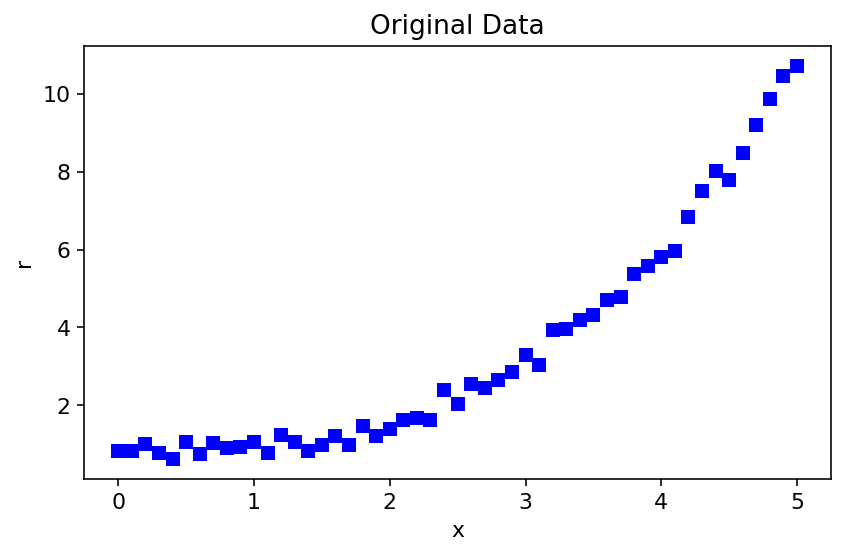

In [3]:
excel_file = 'data/demo-polynomial-2.xlsx'
mydata = pd.read_excel(excel_file)
x = np.array(mydata['x'])
y = np.array(mydata['y'])

N = len(x)

plt.figure()
plt.plot(x, y, 'bs')
plt.xlabel('x')
plt.ylabel('r')
plt.title('Original Data')
plt.tight_layout()
plt.show()

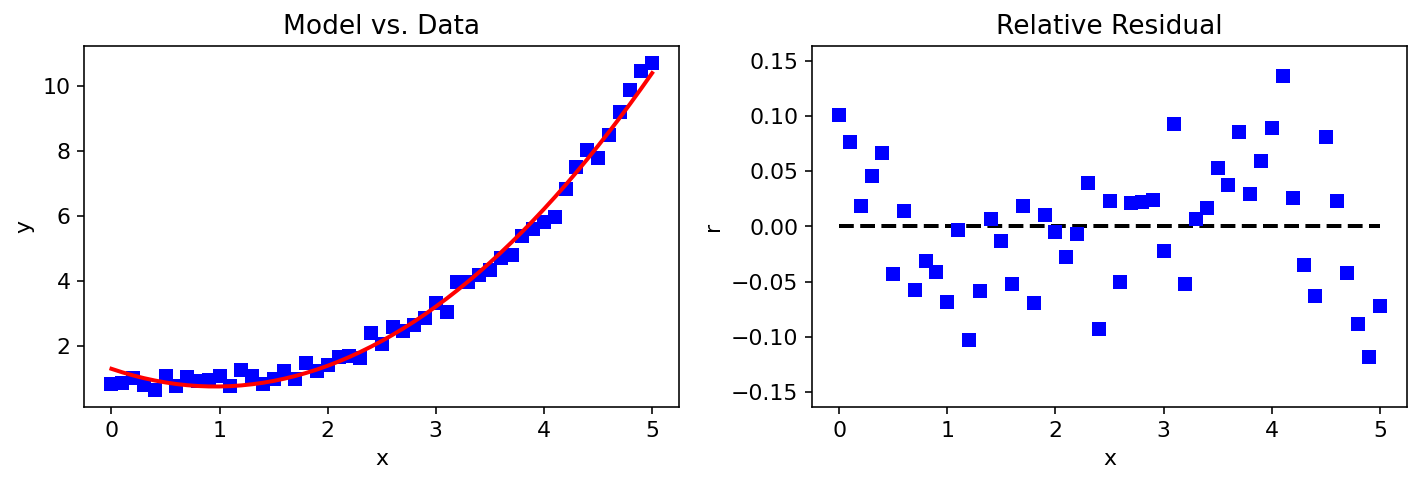

Parameter Values: 95%

   a =   1.282506 +- 0.216663
   b =  -1.136497 +- 0.200402
   c =   0.591853 +- 0.038761

absolute r-squared: 0.99211810  (2.10 nines)
adjusted r-squared: 0.99178969  (2.09 nines)




In [4]:
fit2, err2 = classlib4334.fit_and_plot(p2, x, y)

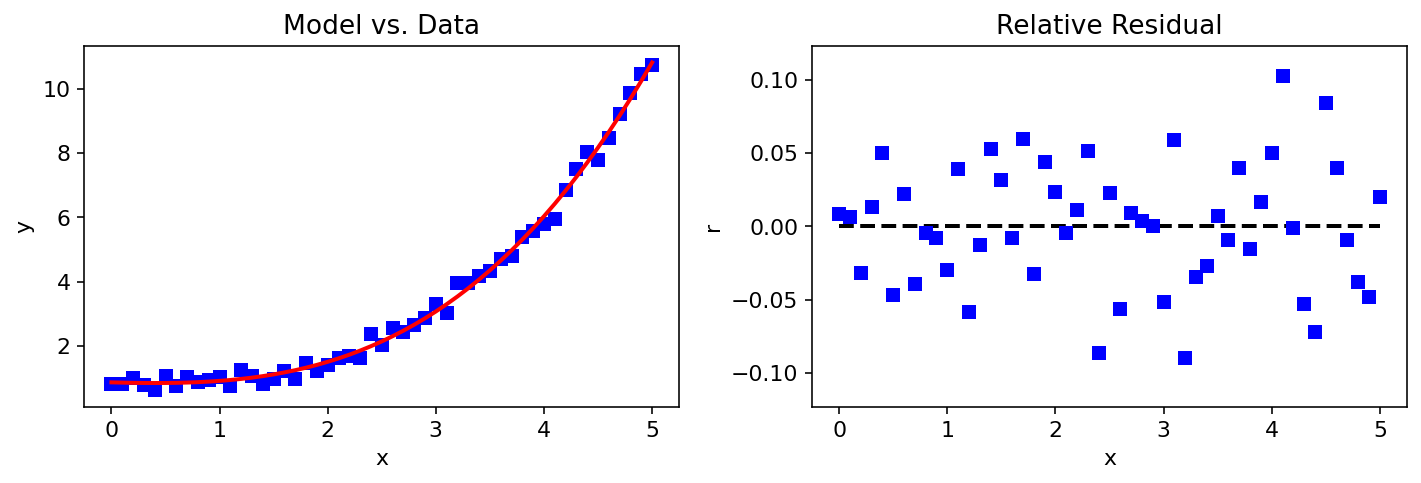

Parameter Values: 95%

   a =   0.866474 +- 0.207042
   b =  -0.085664 +- 0.362182
   c =   0.061200 +- 0.169279
   d =   0.070754 +- 0.022243

absolute r-squared: 0.99576493  (2.37 nines)
adjusted r-squared: 0.99549460  (2.35 nines)




In [5]:
fit3, err3 = classlib4334.fit_and_plot(p3, x, y)

Looking at the fit and the residual, it seems improved.  Both the size and the structure of the residual have decreased.  And both the absolute and adjusted values of $R^2$ increased a little bit.  So this seems like an obvious improvement.  But just for completeness, let's also perform an F-test of the cubic model against the quadratic model.

In [6]:
# Perform an F-Test comparing the two models
ypr2 = p2(x, *fit2)
yav2 = np.mean(y)
ssr2 = sum((ypr2 - y)**2)
sst2 = sum((yav2 - y)**2)
dof2 = N - len(fit2)

ypr3 = p3(x, *fit3)
yav3 = np.mean(y)
ssr3 = sum((ypr3 - y)**2)
sst3 = sum((yav3 - y)**2)
dof3 = N - len(fit3)

f23  = ((ssr2 - ssr3)/ssr3)   /   ((dof2 - dof3)/dof3)

from scipy import stats
p23  = stats.f.sf(f23, dof2-dof3, dof3)
if p23 < .05:
    mstring = "Complex"
else:
    mstring = "Simple"

print('')
print("F-number:  %2.4f" % (f23))
print("P-value:   %2.4f" % (p23))
print("Random?    %2.3f%%" % (p23*100))
print("Choose:    %s" % mstring)
print('')


F-number:  40.4718
P-value:   0.0000
Random?    0.000%
Choose:    Complex



This test tells us that the relative reduction in the residual error is 40 times greater than the relative reduction in degrees of freedom, and that the likelihood of this occuring by chance is effectively zero.  That, in turn, tells us that the new term was a very valuable addition, and the more complex cubic model should be strongly preferred over the simpler quadratic model.

This is where we stopped last demonstration.  But ... could we do even better with an even higher-order polynomial?  Possibly!  Let's try a quartic...

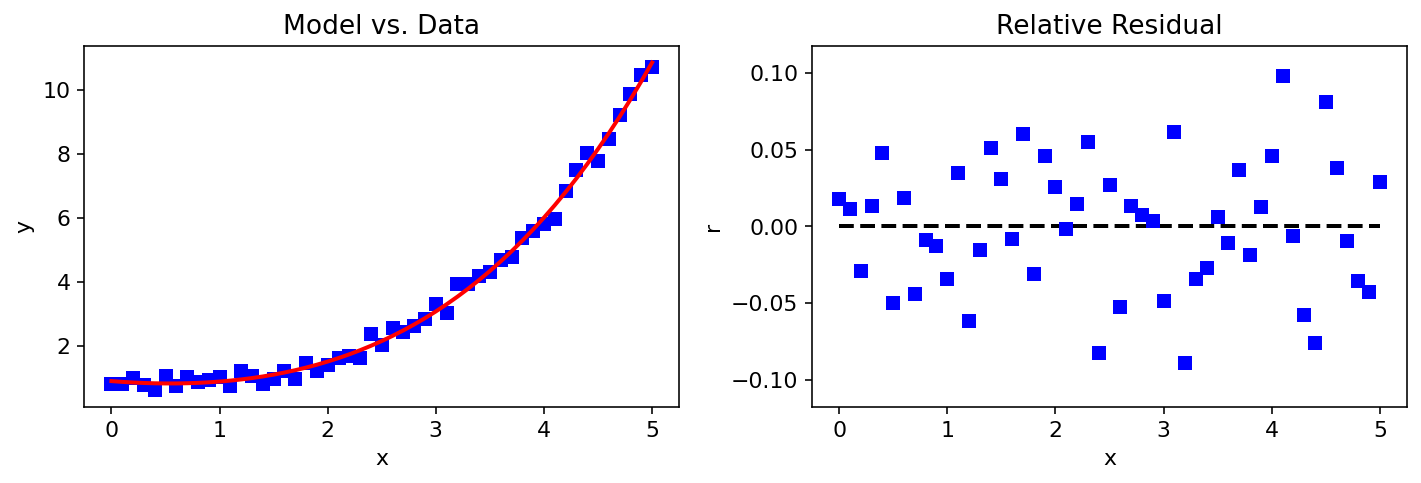

Parameter Values: 95%

   a =   0.907212 +- 0.250057
   b =  -0.264581 +- 0.707567
   c =   0.225967 +- 0.583810
   d =   0.019161 +- 0.176271
   e =   0.005159 +- 0.017484

absolute r-squared: 0.99579675  (2.38 nines)
adjusted r-squared: 0.99543126  (2.34 nines)




In [7]:
fit4, err4 = classlib4334.fit_and_plot(p4, x, y)

Visually we now see no difference with the prior model, but it is possible that a small adjustment has meaningfully improved the fit.  How can we tell?  This is where the quantitative measures become useful.  Looking first at the absolute value of r-squared, we see a small increase compared to the cubic model.  This is expected, as we have introduced an additional fitting term.  In fact, R-squared should **always increase** whenever you add new terms to your model.  However, when we look at the adjusted R-squared, we see a small **decrease** compared to the cubic model.  This is evidence that we may have transitioned into "chasing noise" and the quartic term did not provide additional explanatory or predictive power.

For completeness, let's also perform an F-test comparing the cubic and quartic models.

In [8]:
# Perform an F-Test comparing the two models
ypr3 = p3(x, *fit3)
yav3 = np.mean(y)
ssr3 = sum((ypr3 - y)**2)
sst3 = sum((yav3 - y)**2)
dof3 = N - len(fit3)

ypr4 = p4(x, *fit4)
yav4 = np.mean(y)
ssr4 = sum((ypr4 - y)**2)
sst4 = sum((yav4 - y)**2)
dof4 = N - len(fit4)

f34  = ((ssr3 - ssr4)/ssr4)   /   ((dof3 - dof4)/dof4)

from scipy import stats
p34  = stats.f.sf(f34, dof3-dof4, dof4)
if p34 < .05:
    mstring = "Complex"
else:
    mstring = "Simple"

print('')
print("F-number:  %2.4f" % (f34))
print("P-value:   %2.4f" % (p34))
print("Random?    %2.3f%%" % (p34*100))
print("Choose:    %s" % mstring)
print('')


F-number:  0.3483
P-value:   0.5580
Random?    55.796%
Choose:    Simple



This test tells us that ratio of the decrease in relative error over the decrease in relative DOF is considerably smaller than 1, and comparison with the appropriate F-distribution tells us that there is a 55% probability that the increase in accuracy was due to random fluctuations.  These metrics suggest that the (very) minor improvement that we saw in the residual is not worth the additional model complexity.

We conclude that the best model we've seen so far is in fact the cubic model we obtained last time, and it's worth summarizing it:
$$ y = A + Bx + Cx^2 + Dx^3$$
where
$$ A = 0.87 \pm 0.21 $$
$$ B = -0.086 \pm 0.36 $$
$$ C = 0.061 \pm 0.17 $$
$$ D = 0.071 \pm 0.022 $$
with coefficient uncertainties given at the 95% confidence level.

# Going Further

But wait ... I notice that the fitted value of $B$ is small relative to its confidence interval, which means *zero is in that interval.*  This is also true of $C$.  So ... do I really need those linear and quadratic terms?  Could I have gotten *just about* as good of a fit if I had omitted them?  And would there be value in doing so?  Let's explore just a bit more, and define a custom polynomial with only 0th and 3rd order terms.

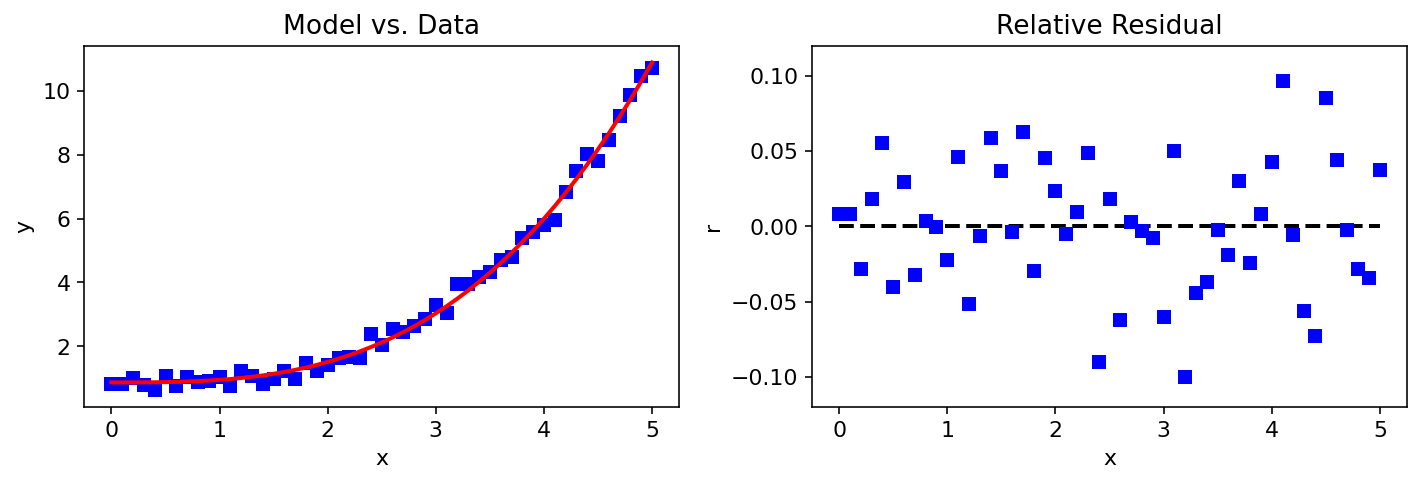

Parameter Values: 95%

   a =   0.866712 +- 0.073337
   d =   0.080188 +- 0.001515

absolute r-squared: 0.99564893  (2.36 nines)
adjusted r-squared: 0.99556013  (2.35 nines)




In [9]:
def custom_p3(x, a, d):
    return a + d*x**3

fitc, errc = classlib4334.fit_and_plot(custom_p3, x, y)

Visually, this doesn't seem any worse the "full" cubic model, which is promising.  But let's look at the quantitative measures.  The absolute R-squared decreased slightly, as it should because we have a simpler model.  However, the adjusted R-squared has actually **increased** (very slightly) compared to the full cubic model.  This suggests that the full cubic has no more predictive power than the simpler reduced cubic.  

Finally, let's perform an F-test comparing the full and reduced cubics.

In [10]:
# Perform an F-Test comparing the two models
ypr3 = p3(x, *fit3)
yav3 = np.mean(y)
ssr3 = sum((ypr3 - y)**2)
sst3 = sum((yav3 - y)**2)
dof3 = N - len(fit3)

yprc = custom_p3(x, *fitc)
yavc = np.mean(y)
ssrc = sum((yprc - y)**2)
sstc = sum((yavc - y)**2)
dofc = N - len(fitc)

fc3  = ((ssrc - ssr3)/ssr3)   /   ((dofc - dof3)/dof3)

from scipy import stats
pc3  = stats.f.sf(fc3, dofc-dof3, dof3)
if pc3 < .05:
    mstring = "Complex"
else:
    mstring = "Simple"

print('')
print("F-number:  %2.4f" % (fc3))
print("P-value:   %2.4f" % (pc3))
print("Random?    %2.3f%%" % (pc3*100))
print("Choose:    %s" % mstring)
print('')


F-number:  0.6437
P-value:   0.5299
Random?    52.992%
Choose:    Simple



This F-test also produces a value less than one, and comparison with the appropriate F-distribution suggests that the improved accuracy of the full cubic is again about 50% likely to have occurred by chance.

We conclude that the linear and quadratic terms offer no increase in the predictive power of this model for this data set.  If I am able to get just a good of a model with **fewer parameters**, I will choose to do so, under the reasoning of Occam's Razor.  So my final model is

$$ y = A + Dx^3$$
where
$$ A = 0.87 \pm 0.037 $$
$$ D = 0.08 \pm 0.00076 $$
with coefficient uncertainties given at the 95% confidence level.

**IMPORTANT NOTE**:  See how the uncertainties in the fits of $A$ and $D$ actually ***decreased*** compared to model 2 when I removed potentially extraneous terms from my model!

### Epiloge to Exercise 2

If you really want to make your brain hurt, I will now reveal the function I actually used to generate the data:  it was

$$ y = 1.0 - 0.33 x + 0.2 x^2 + 0.05 x^3 + \eta(0.2)$$

This looks meaningfully different than we obtained even in the full cubic model, and the linear and quadradic terms were ***present*** in the data!  What?!?!

This really threw me for a loop at first, but remember that the data were moderately noisy.  The lesson here (familiar to any photography enthusiast) is that ***noise obscures fine-scale structure***.  You may feel that there wasn't *too* much noise in the data, but it was enough to introduce considerable uncertainty into our parameter estimates in the full cubic model, to the point where we concluded the linear and quadratic terms from that model didn't help enough to keep.

In the real world, where you do not already have model, you **will not know** the function that generated the data!  You will only have the noisy data, and the noisier it is, the more detail will be undetectable.  So without access to more measurements that could reduce the noise, I stand by the last model we developed as the "best, simplest" model **for the data we were given**.

I'll conclude with a plot containing the data, the final, reduced cubic model, and the generating function.

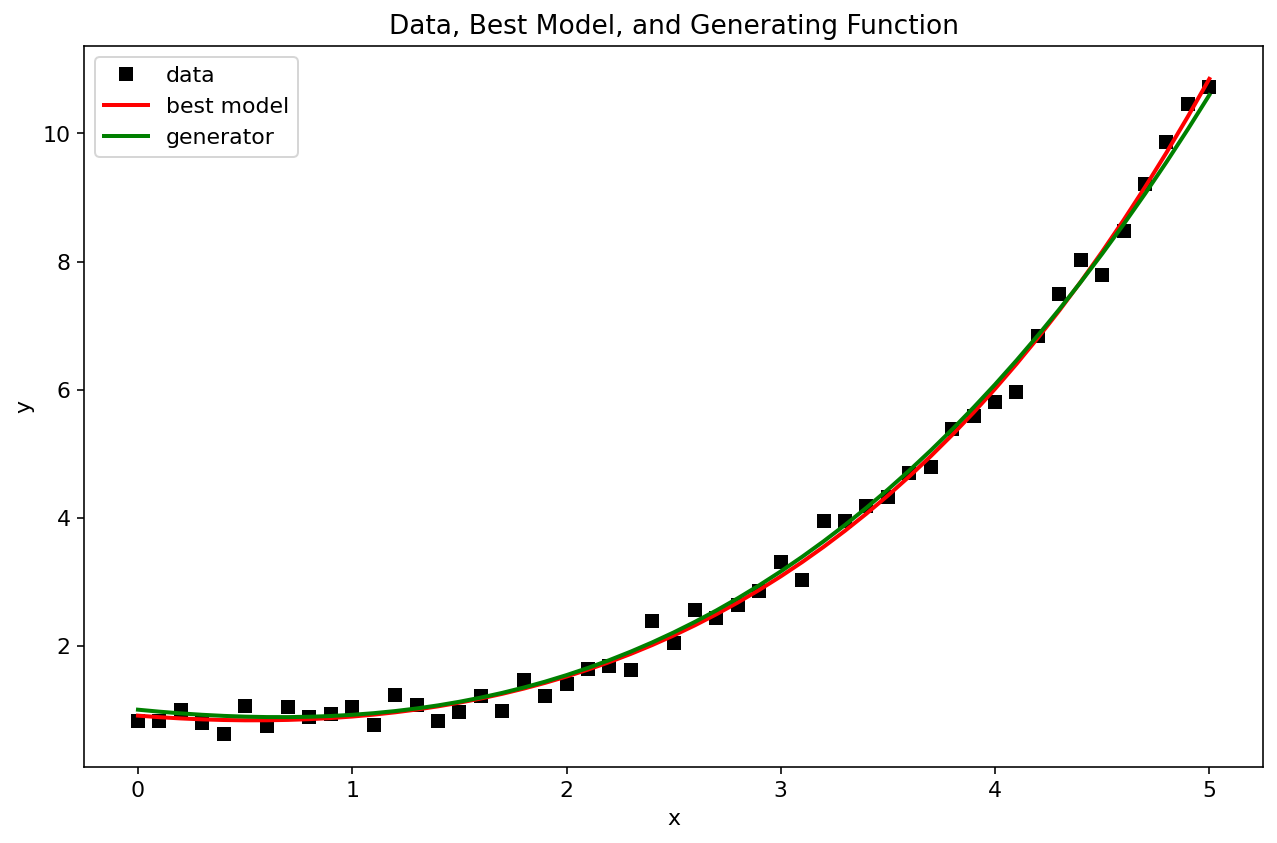

In [11]:
plt.figure(figsize=(9,6))
plt.plot(x,y,'ks',label='data')
plt.plot(x,ypr4,'r',label='best model')
plt.plot(x, 1.0 - 0.33*x + 0.2*x**2 + 0.05*x**3, 'g', label='generator')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.title('Data, Best Model, and Generating Function')
plt.tight_layout()
plt.show()

# Another Helper Function

In [12]:
fnum, pval = classlib4334.compare_nested(x, y, custom_p3, p3)

F-test comparing custom_p3 (simple) vs. p3 (complex)

  F-number: 0.6437 
  P-value:  0.5299 
  Random?   52.992%

It is recommended to prefer the simple function.

